In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

# Pré processamento dos dados

Aqui vou fazer um pré processamento dos dados para que eu possa treinar o modelo. Com o objetivo de treinar minhas habilidades em programação e tentar criar um modelo que use o mínimo possível de bibliotecas prontas, vou pré processar esses dados sem nenhuma biblioteca feita para isso.
Os passos para o pré processamento são:

1. Separar os dados em 2 conjuntos: **Numéricos**, **Binários** e **Categóricos**
2. Criar uma coluna para cada característica (portanto o número de colunas será dobrado) com 1 se o dado já existia e com 0 se o dado não existia (era Nan), para que o modelo possa levar em consideração se esse dado foi substituído por outro valor ou não (já que vou utilizar algumas técnicas para lidar com os valores que faltam.
    - Substituir os dados categóricos que faltam com 'desconhecido'
    - Substituir os dados binários que faltam pelo valor mais frequente
    - Substituir os dados numéricos que faltam pelo valor médio
3. Quantificar os dados categóricos, substituindo a coluna para cada característica categórica por N colunas, onde N é o número de valores únicos para aquela característica, onde vai receber o valor de 1 se aquela linha apresenta aquela característica ou 0 se não apresentar. Esse método chama-se 'hot encoding'

## Carregando os dados

In [3]:
train2 = pd.read_csv('train.csv')
train = train2.to_numpy()
test2 = pd.read_csv('test.csv')
test = test2.to_numpy()

x_train = train[:,0:-1]
y_train = train[:,-1]
y_train = y_train.astype(int)

In [4]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

## Dando uma olhada nos dados

In [5]:
categorical_features = ['HomePlanet', 'Destination']
binary_features = ['CryoSleep', 'VIP']
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

A = train2.copy() #sempre copio para evitar de mudar o dado original
TransT = A[A['Transported']==True]
TransF = A[A['Transported']==False]
NT = TransT.shape[0]
NF = TransF.shape[0]

print(f'{NT} foram transportadas, enquanto {NF} não foram transportadas')

4378 foram transportadas, enquanto 4315 não foram transportadas


### Quantos _missing values_ existem em cada coluna?

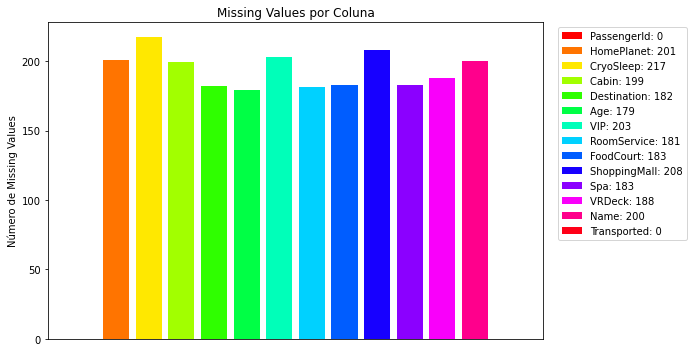

In [6]:
miss = A.isnull().sum()
# print(miss.to_frame('Missing Values').T)


plt.figure(figsize=(10, 5))
cores = plt.cm.get_cmap('hsv', len(miss))  # Obtém um mapa de cores com o número correto de cores

barras = plt.bar(range(len(miss)), miss.values, color=cores(range(len(miss))))  # Usa o mapa de cores

plt.xticks([])
plt.ylabel('Número de Missing Values')
plt.title('Missing Values por Coluna')

plt.legend(barras, [f"{idx}: {val}" for idx, val in miss.items()], bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

###  Pie plot dos dados categóricos e binários

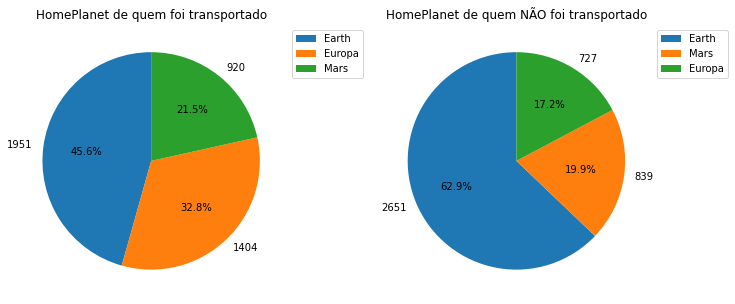

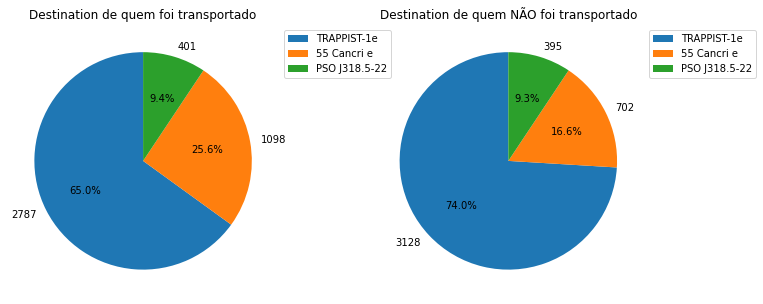

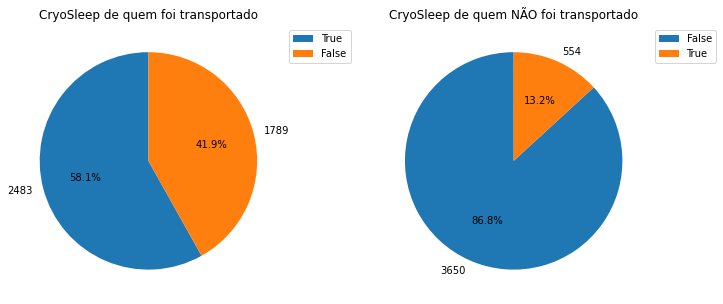

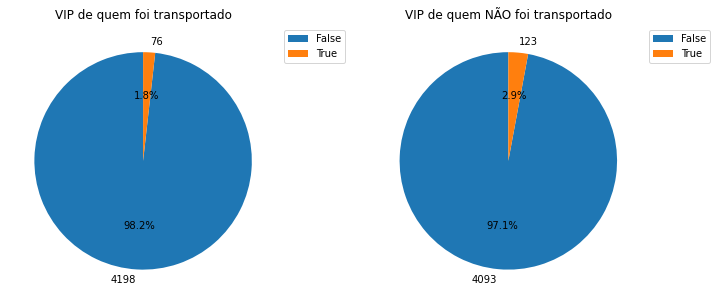

In [7]:
cat_e_bin = categorical_features+binary_features

for col in cat_e_bin:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) #subplot, com 2 plots para cada conjunto de dados
    counts_A = TransT[col].value_counts()
    counts_B = TransF[col].value_counts()
    ax1.pie(counts_A, labels=counts_A, autopct='%1.1f%%', startangle=90) #autopct mostra a porcentagem
    ax1.set_title(f'{col} de quem foi transportado')
    ax1.legend(counts_A.index, bbox_to_anchor=(1, 1))

    ax2.pie(counts_B, labels=counts_B, autopct='%1.1f%%', startangle=90)
    ax2.set_title(f'{col} de quem NÃO foi transportado')
    ax2.legend(counts_B.index, bbox_to_anchor=(1, 1))

    plt.show()

### Histograma dos dados numéricos

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='RoomService', ylabel='Count'>

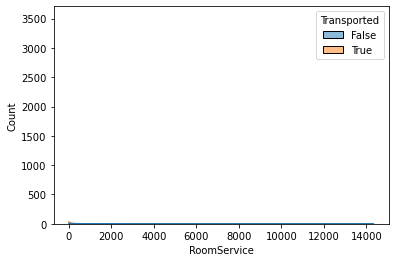

In [18]:
sns.histplot(data=train2, x='RoomService', binwidth=1 ,hue='Transported', kde=True)

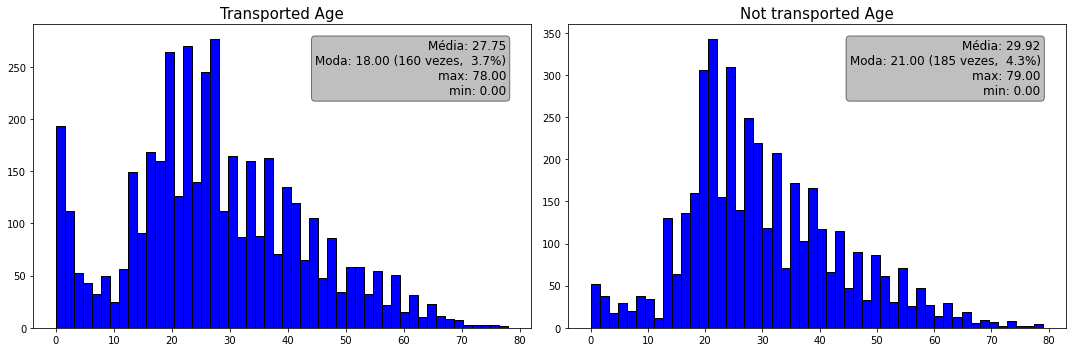

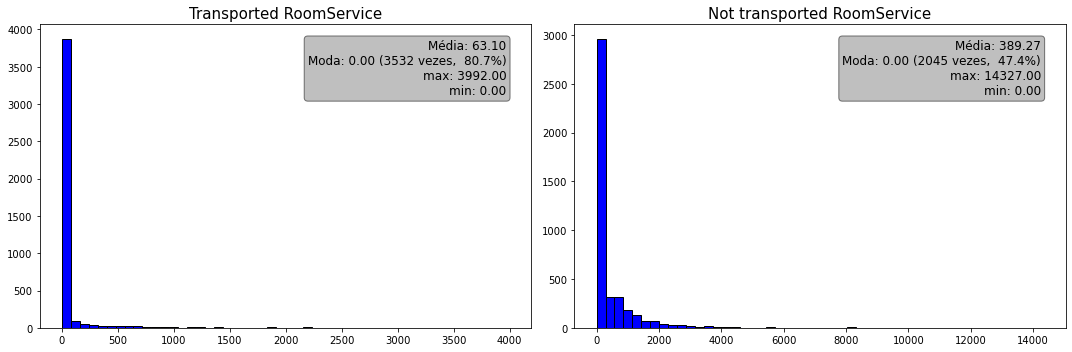

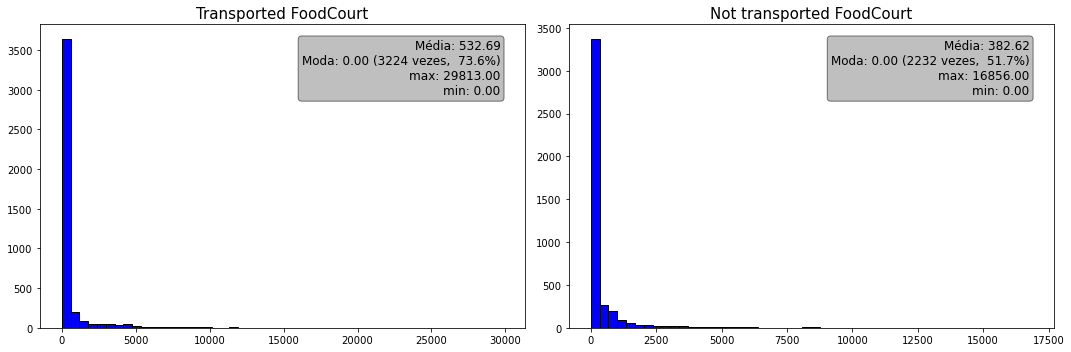

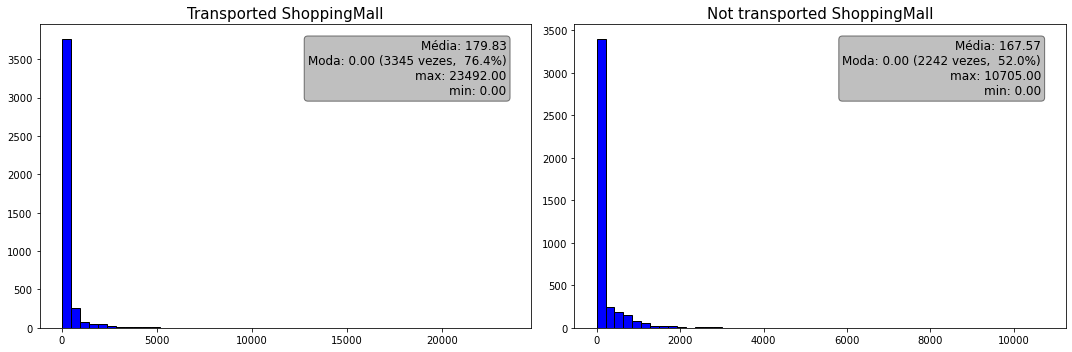

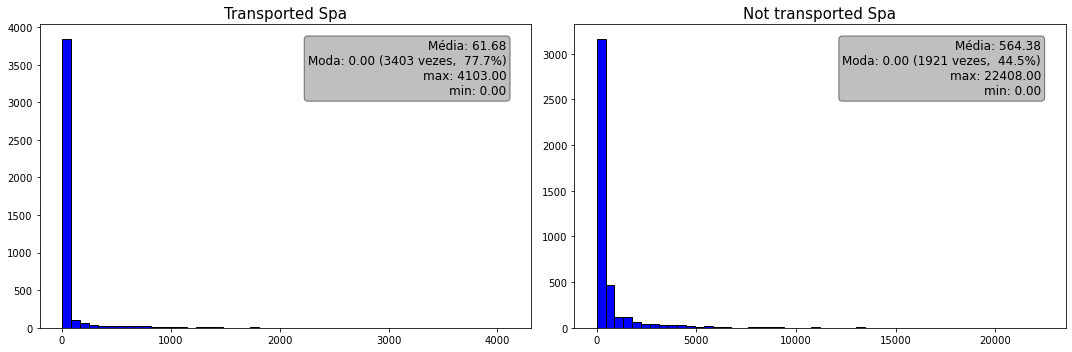

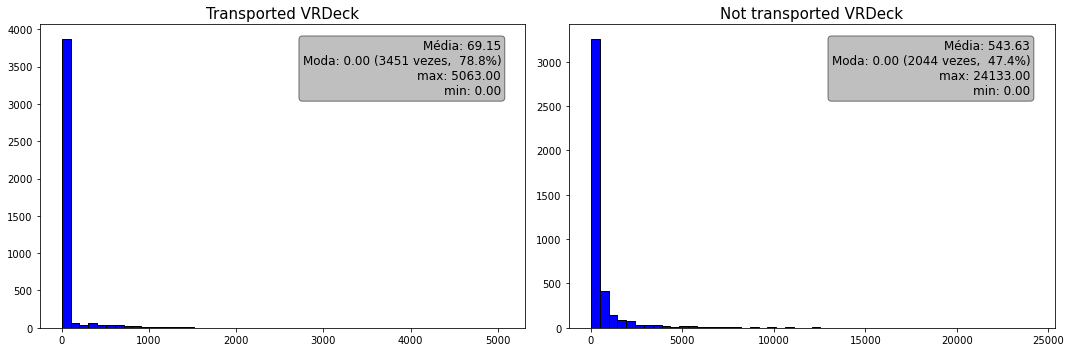

In [15]:
for col in numerical_features:
    
    meanT = np.mean(TransT[col].dropna().values)
    meanF = np.mean(TransF[col].dropna().values)
    maxT = np.max(TransT[col].dropna().values)
    maxF = np.max(TransF[col].dropna().values)
    minT = np.min(TransT[col].dropna().values)
    minF = np.min(TransF[col].dropna().values)
    modeT = st.mode(TransT[col].dropna().values)
    modeF = st.mode(TransF[col].dropna().values)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.hist(TransT[col].dropna().values, bins = 50, color='blue', edgecolor = 'black')
    ax1.set_title(f'Transported {col}',fontsize = 15)
    
    #Isso aqui me lembrou C++
    text_ax1 = (
    f'Média: {meanT:.2f}\n'
    f'Moda: {modeT.mode[0]:.2f} ({modeT.count[0]} vezes, {(modeT.count[0]/NT)*100: .1f}%)\n'
    f'max: {maxT:.2f}\n'
    f'min: {minT:.2f}'
    f''
    )
    ax1.text(0.95, 0.95, text_ax1, transform=ax1.transAxes, fontsize=12,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round,pad=0.3', fc='gray', alpha=0.5))

    ax2.hist(TransF[col].dropna().values, bins = 50, color='blue', edgecolor = 'black')
    ax2.set_title(f'Not transported {col}',fontsize = 15)

    text_ax2 = (
    f'Média: {meanF:.2f}\n'
    f'Moda: {modeF.mode[0]:.2f} ({modeF.count[0]} vezes, {(modeF.count[0]/NF)*100: .1f}%)\n'
    f'max: {maxF:.2f}\n'
    f'min: {minF:.2f}'
    f''
    )
    ax2.text(0.95, 0.95, text_ax2, transform=ax2.transAxes, fontsize=12,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round,pad=0.3', fc='gray', alpha=0.5))

    plt.tight_layout()
    plt.show()

De acordo com os histogramas acima é possível notar que a maior parte das pessoas não gastou dinheiro em nenhum lugar (Room service, Food Court, Shopping mall, SPA e VR deck). Até então pensei em 2 possibilidades para tratar os dados numéricos:
- Reduzir os dados numéricos (com excessão da idade) para 1 coluna correspondendo à soma total dos gastos, isso reduz a dimensionalidade do problema
- Definir um limite de gasto, e criar uma coluna de valores binários onde 1 corresponde à pessoa que gastou mais que o limite e 0 a pessoa que não passou desse limite

## Separando os dados

In [3]:
#ndarrys com os dados agrupados por tipo
cat_tr = train2[categorical_features].values
bin_tr = train2[binary_features].values
num_tr = train2[numerical_features].values

cat_t = test2[categorical_features].values
bin_t = test2[binary_features].values
num_t = test2[numerical_features].values

#Processando dados categóricos
def process_categ(categorical):
    categorical2 = categorical.copy()
    categorical2[pd.isnull(categorical2)]='nan'
    uniqs = [list(set(categorical2[:, i])) for i in range(categorical2.shape[1])]

    new_categ = np.zeros((categorical.shape[0],sum(map(len,uniqs))),dtype = int)
    aux = 0;
    for idcol, col in enumerate(categorical.T):
        col2 = col.copy()
        col2[pd.isnull(col2)] = 'nan'
        for idcat, cat in enumerate(np.unique(col2)):
            bol = (col2 == cat).astype(int)
            new_categ[:,aux] = bol
            aux+=1
    return new_categ


#Processando dados binários
def process_bin(binary):
    new_binary = np.zeros((binary.shape[0], binary.shape[1]*2))
    for idcol, col in enumerate(binary.T): #itera sobre cada feature
        newcol = col.copy()
        mfv = np.bincount(newcol[~np.isnan(newcol.astype(float))].astype(int)).argmax() #valor mais frequente (most frequent value)
        new_binary[:,(binary.shape[1] + idcol)] = np.isnan(newcol.astype(float)).astype(int)
        newcol[np.isnan(newcol.astype(float))] = mfv  #substitui os valores nan pelo mfv
        new_binary[:,idcol] = newcol.astype(int)
    return new_binary

    

#Processando dados numéricos
def process_num(numerical, normalize=True):
    new_numerical = np.zeros((numerical.shape[0],numerical.shape[1]))
    for idcol, numcol in enumerate(numerical.T):
        newnumcol = numcol.copy()
        col_mean = np.mean(newnumcol[~np.isnan(newnumcol)])
        newnumcol[np.isnan(newnumcol)]=col_mean
        new_numerical[:,idcol] = newnumcol
        if normalize:
            col_min = np.min(new_numerical[:, idcol])
            col_max = np.max(new_numerical[:, idcol])
            if col_max - col_min != 0:  # Evita divisão por zero
                new_numerical[:, idcol] = (new_numerical[:, idcol] - col_min) / (col_max - col_min)

    return new_numerical

In [4]:
#processando os dados
new_bin_tr = process_bin(bin_tr)
new_cat_tr = process_categ(cat_tr)
new_num_tr = process_num(num_tr)
print(new_num_tr.shape)


new_bin_t = process_bin(bin_t)
new_cat_t = process_categ(cat_t)
new_num_t = process_num(num_t)

#unindo os dados
new_train = np.concatenate((new_bin_tr,new_cat_tr,new_num_tr),axis=1)
new_test = np.concatenate((new_bin_t,new_cat_t,new_num_t),axis=1)

(8693, 6)


# Código que define uma classe para o modelo

In [36]:
class NnModel:
    def __init__(self,x: np.ndarray, y: np.ndarray, hidden_neurons: int = 10, output_neurons: int = 1):
        np.random.seed(8)
        self.x = x
        self.y = y
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.input_neurons = self.x.shape[1]
        
        #inicialização de pesos e bias
        #Xavier inicialization -> variância dos pesos igual em todas as camadas
        self.W1 = np.random.randn(self.input_neurons, self.hidden_neurons)/np.sqrt(self.input_neurons)
        self.B1 = np.zeros((1,self.hidden_neurons))
        self.W2 = np.random.randn(self.hidden_neurons, self.output_neurons)/np.sqrt(self.hidden_neurons)
        self.B2 = np.zeros((1,self.output_neurons))
        self.model_dict = {'W1': self.W1, 'B1': self.B1, 'W2': self.W2, 'B2': self.B2}
        self.z1 = 0
        self.f1 = 0
        
    def foward(self, x):
        self.z1 = x.dot(self.W1) + self.B1
        self.f1 = np.tanh(self.z1)
        z2 = self.f1.dot(self.W2) + self.B2
        sigmoid = 1 / (1 + np.exp(-z2)) #Função de ativação sigmoid
        return sigmoid
        
#         #equação da reta (1)
#         self.z1 = x.dot(self.W1) + self.B1
        
#         #função de ativação (1)
#         self.f1 = 1/(1+np.exp(-self.z1))
        
#         #equação da reta (2)
#         z2 = self.f1.dot(self.W2) + self.B2
        
#         #Softmax
#         exp_values = np.exp(z2)
#         softmax = exp_values/np.sum(exp_values, axis = 1, keepdims = True)
#         return softmax
    
    def loss(self, sigmoid: np.ndarray):
        m = self.y.shape[0]
        loss = -(1 / m) * np.sum(self.y * np.log(sigmoid) + (1 - self.y) * np.log(1 - sigmoid)) #binary cross entropy
        return loss
        
#         #cross entropy
#         predictions = np.zeros(self.y.shape[0])
        
#         for i, correct_index in enumerate(self.y):
#             predicted = softmax[i][correct_index]
#             predictions[i] = predicted
            
#         log_prob = -np.log(predicted)
#         return log_prob/self.y.shape[0]
    
    def backpropagation(self, sigmoid: np.ndarray, learning_rate: float) -> None:
        m = self.y.shape[0]
        delta2 = sigmoid - self.y.reshape(sigmoid.shape)
        dW2 = (self.f1.T).dot(delta2)
        dB2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = delta2.dot(self.W2.T) * (1 - np.power(np.tanh(self.z1), 2))
        dW1 = self.x.T.dot(delta1)
        dB1 = np.sum(delta1, axis=0, keepdims=True)

        self.W1 -= learning_rate * dW1 / m
        self.W2 -= learning_rate * dW2 / m
        self.B1 -= learning_rate * dB1 / m
        self.B2 -= learning_rate * dB2 / m
        
        
#         delta2 = np.copy(softmax)
#         delta2[range(self.x.shape[0]),self.y]-=1
#         dW2 = (self.f1.T).dot(delta2)
#         dB2 = np.sum(delta2, axis = 0, keepdims = True)
#         delta1 = delta2.dot(self.W2.T)*(1-np.power(np.tanh(self.z1),2))
#         dW1 = self.x.T.dot(delta1)
#         dB1 = np.sum(delta1, axis = 0, keepdims = True)
        
#         #atualização dos pesos e bias
#         self.W1 += learning_rate*dW1
#         self.W2 += learning_rate*dW2
#         self.B1 += learning_rate*dB1
#         self.B2 += learning_rate*dB2
    
    def fit(self, epochs: int, lr: float):
        for epoch in range(epochs):
            outputs = self.foward(self.x)
            loss = self.loss(outputs)
            self.backpropagation(outputs, lr)

            predictions = np.round(outputs).flatten().astype(int) #Definindo valores de saída binários.
            accuracy = np.mean(predictions == self.y)

            if int((epoch + 1) % (epochs / 10)) == 0:
                print(f'Epoch: [{epoch + 1} / {epochs}] Accuracy: {accuracy:.3f} Loss = {loss:.4f}')
        return predictions

#             outputs = self.foward(self.x)    #
#             loss = self.loss(outputs)        # Essas 3 linhas bastam para o treinamento
#             self.backpropagation(outputs,lr) #
            
#             ##### visualizações ########
            
#             #acuracia
#             prediction = np.argmax(outputs, axis = 1)
#             correct = (prediction == self.y).sum()
#             accuracy = correct/self.y.shape[0]
            
#             if int((epoch+1)%(epochs/10)) == 0:
#                 print(f'Epoch: [{epoch + 1} / {epochs}] Accuracy: {accuracy:.3f} Loss = {loss.item():.4f}')
#         return prediction

In [44]:
model = NnModel(new_train, y_train, hidden_neurons = 200, output_neurons = 1)
# model.model_dict
previsoes = model.fit(epochs=100, lr=0.01)

Epoch: [10 / 100] Accuracy: 0.452 Loss = 6058.7963
Epoch: [20 / 100] Accuracy: 0.530 Loss = 6056.4631
Epoch: [30 / 100] Accuracy: 0.633 Loss = 6062.4434
Epoch: [40 / 100] Accuracy: 0.661 Loss = 6075.0921
Epoch: [50 / 100] Accuracy: 0.670 Loss = 6093.0302
Epoch: [60 / 100] Accuracy: 0.677 Loss = 6115.1089
Epoch: [70 / 100] Accuracy: 0.680 Loss = 6140.3764
Epoch: [80 / 100] Accuracy: 0.680 Loss = 6168.0479
Epoch: [90 / 100] Accuracy: 0.681 Loss = 6197.4791
Epoch: [100 / 100] Accuracy: 0.681 Loss = 6228.1429


In [51]:
previsoes_test = model.foward(test)

#Como a resposta são floats entre 0 e 1, vamos aproximar os valores em binário (0 ou 1).
previsoes_test = np.round(previsoes_test).flatten().astype(int)

ValueError: shapes (4277,13) and (18,200) not aligned: 13 (dim 1) != 18 (dim 0)

In [48]:
passenger_ids = test2['PassengerId']

result_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': previsoes
})

result_df.to_csv('nNmodel_1.csv', index=False)

ValueError: array length 8693 does not match index length 4277